In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

C:\Users\saleh\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
UsageError: Line magic function `%` not found.


In [2]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
sns.set_color_codes()

In [3]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')
sub = pd.read_csv('SampleSubmission.csv')

In [4]:
train.head()

,Applicant_ID,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,form_field10,form_field11,form_field12,form_field13,form_field14,form_field15,form_field16,form_field17,form_field18,form_field19,form_field20,form_field21,form_field22,form_field23,form_field24,form_field25,form_field26,form_field27,form_field28,form_field29,form_field30,form_field31,form_field32,form_field33,form_field34,form_field35,form_field36,form_field37,form_field38,form_field39,form_field40,form_field41,form_field42,form_field43,form_field44,form_field45,form_field46,form_field47,form_field48,form_field49,form_field50,default_status
0,Apcnt_1000000,3436.0,0.28505,1.6560,0.0,0.000,0.0,10689720.0,252072.0,4272776.0,11333126.0,4397256.0,2301324.0,7875694.0,96375139,112181765.0,1.0,1.0,1.0,3.0,3.0,134.655,NaN,NaN,134.655,4000.5,17064.0,11376.0,60.0,17064.0,5962.0,NaN,1052.0,8.0000,2.0,NaN,12.0,12.0,4.0,0.0,NaN,NaN,0.392854,2.02,0.711632,0.0,0.0,charge,NaN,1.129518,0.044335,no
1,Apcnt_1000004,3456.0,0.67400,0.2342,0.0,0.000,0.0,898979.0,497531.0,9073814.0,2533168.0,244292.0,3982971.0,2141445.0,28141427,45169902.0,1.0,1.0,1.0,2.0,2.0,109.230,11385.24,14584.29,86.685,4161.0,13413.0,8942.0,304.0,13413.0,5780.0,NaN,2554.0,17.5000,0.0,0.0,16.0,24.0,8.0,0.0,NaN,NaN,0.314281,8.08,0.183584,NaN,0.0,charge,349.805730,1.620483,0.322436,no
2,Apcnt_1000008,3276.0,0.53845,3.1510,0.0,6.282,NaN,956940.0,NaN,192944.0,1079864.0,NaN,NaN,0.0,16576457,22452691.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,1597.5,4746.0,3164.0,60.0,15696.0,NaN,14508.0,70.0,0.6666,0.0,NaN,12.0,0.0,6.0,0.0,149.6805,NaN,0.162965,18.18,0.791136,0.0,0.0,charge,NaN,1.513370,0.011640,yes
3,Apcnt_1000012,3372.0,0.17005,0.5050,0.0,0.000,192166.0,3044703.0,385499.0,3986472.0,3621979.0,NaN,771776.0,1186839.0,48187375,136297820.0,0.0,0.0,0.0,1.0,1.0,120.120,8580.00,0.00,85.800,1701.0,4014.0,2676.0,60.0,11679.0,NaN,NaN,522.0,7.8334,1.0,1.0,4.0,8.0,4.0,1.0,NaN,NaN,0.488884,2.02,0.685168,NaN,0.0,charge,89.940100,0.664452,0.082729,no
4,Apcnt_1000016,3370.0,0.77270,1.1010,0.0,0.000,1556.0,214728.0,214728.0,1284089.0,361770.0,396391.0,818456.0,511535.0,28141427,15292757.0,0.0,0.0,0.0,3.0,3.0,104.535,8360.19,10326.45,115.335,1551.0,3285.0,2190.0,60.0,19437.0,12958.0,5202.0,272.0,1.0000,0.0,0.0,24.0,2.0,24.0,0.0,150.0135,NaN,0.275000,12.12,0.438168,0.0,0.0,charge,97.887502,1.427891,0.045630,no


In [5]:
test.head()

,Applicant_ID,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,form_field10,form_field11,form_field12,form_field13,form_field14,form_field15,form_field16,form_field17,form_field18,form_field19,form_field20,form_field21,form_field22,form_field23,form_field24,form_field25,form_field26,form_field27,form_field28,form_field29,form_field30,form_field31,form_field32,form_field33,form_field34,form_field35,form_field36,form_field37,form_field38,form_field39,form_field40,form_field41,form_field42,form_field43,form_field44,form_field45,form_field46,form_field47,form_field48,form_field49,form_field50
0,Apcnt_1000032,3236.0,0.34875,10.2006,0.0000,0.0,418564.0,418564.0,418564.0,540710.0,0.0,1649749.0,5446.0,0.0,48187375,114686147.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,1086.0,6204.0,2676.0,60.0,14691.0,9794.0,NaN,238.0,1.8334,0.0,NaN,22.0,2.0,14.0,0.0,NaN,NaN,0.825000,1.01,0.800000,NaN,0.0,charge,NaN,0.000000,0.011221
1,Apcnt_1000048,3284.0,1.27360,2.9606,9.0198,0.0,0.0,9858816.0,49014.0,1510098.0,18308285.0,622789.0,1025793.0,1396510.0,34694910,87479487.0,1.0,1.0,1.0,2.0,2.0,142.560,NaN,NaN,570.585,3082.5,10221.0,6814.0,60.0,11955.0,3528.0,NaN,1216.0,19.5000,3.0,NaN,30.0,18.0,14.0,2.0,NaN,18.8415,0.507694,4.04,0.623248,1.0,0.0,lending,NaN,0.504974,0.043525
2,Apcnt_1000052,NaN,0.27505,0.0600,0.0000,0.0,NaN,NaN,NaN,NaN,0.0,118256.0,NaN,NaN,21973443,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,852.0,4836.0,NaN,NaN,NaN,7.8334,0.0,NaN,2.0,NaN,0.0,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,charge,NaN,0.000000,NaN
3,Apcnt_1000076,3232.0,0.28505,2.8032,0.0000,0.0,0.0,473802.0,473802.0,1724437.0,493641.0,1391064.0,1176725.0,1220293.0,16576457,NaN,2.0,2.0,2.0,3.0,3.0,109.005,13050.00,NaN,109.005,1414.5,4197.0,2798.0,60.0,14964.0,NaN,NaN,248.0,9.0000,1.0,1.0,36.0,0.0,26.0,0.0,NaN,NaN,0.916663,2.02,0.464224,NaN,NaN,charge,90.163742,0.788809,0.104029
4,Apcnt_1000080,3466.0,2.09545,0.8318,2.5182,0.0,19839.0,1150662.0,1150662.0,7860523.0,5752921.0,271133.0,613064.0,4779643.0,48187375,72049802.0,0.0,0.0,0.0,3.0,3.0,139.065,469.29,469.29,15.180,2724.0,9855.0,6570.0,182.0,11679.0,5900.0,NaN,2388.0,16.6666,1.0,0.0,24.0,28.0,20.0,0.0,NaN,NaN,0.234047,23.23,0.726688,0.0,0.0,lending,1303.587148,1.637733,0.163124


In [6]:
train.shape, test.shape

((56000, 52), (24000, 51))

In [7]:
train.info()
print ('\n')
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56000 entries, 0 to 55999
Data columns (total 52 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Applicant_ID    56000 non-null  object 
 1   form_field1     53471 non-null  float64
 2   form_field2     52156 non-null  float64
 3   form_field3     55645 non-null  float64
 4   form_field4     55645 non-null  float64
 5   form_field5     55645 non-null  float64
 6   form_field6     42640 non-null  float64
 7   form_field7     50837 non-null  float64
 8   form_field8     42640 non-null  float64
 9   form_field9     47992 non-null  float64
 10  form_field10    55645 non-null  float64
 11  form_field11    24579 non-null  float64
 12  form_field12    46105 non-null  float64
 13  form_field13    50111 non-null  float64
 14  form_field14    56000 non-null  int64  
 15  form_field15    33525 non-null  float64
 16  form_field16    42964 non-null  float64
 17  form_field17    44849 non-null 

In [8]:
(train.isna().sum()/len(train))*100

Applicant_ID       0.000000
form_field1        4.516071
form_field2        6.864286
form_field3        0.633929
form_field4        0.633929
form_field5        0.633929
form_field6       23.857143
form_field7        9.219643
form_field8       23.857143
form_field9       14.300000
form_field10       0.633929
form_field11      56.108929
form_field12      17.669643
form_field13      10.516071
form_field14       0.000000
form_field15      40.133929
form_field16      23.278571
form_field17      19.912500
form_field18      18.575000
form_field19       0.007143
form_field20       0.633929
form_field21      28.310714
form_field22      36.428571
form_field23      50.219643
form_field24      23.744643
form_field25       9.732143
form_field26      13.282143
form_field27      16.605357
form_field28       0.633929
form_field29       0.633929
form_field30      45.551786
form_field31      70.371429
form_field32       9.732143
form_field33       2.242857
form_field34       0.633929
form_field35      41

In [9]:
train.describe()

,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,form_field10,form_field11,form_field12,form_field13,form_field14,form_field15,form_field16,form_field17,form_field18,form_field19,form_field20,form_field21,form_field22,form_field23,form_field24,form_field25,form_field26,form_field27,form_field28,form_field29,form_field30,form_field31,form_field32,form_field33,form_field34,form_field35,form_field36,form_field37,form_field38,form_field39,form_field40,form_field41,form_field42,form_field43,form_field44,form_field45,form_field46,form_field48,form_field49,form_field50
count,53471.000000,52156.000000,55645.000000,55645.000000,55645.000000,4.264000e+04,5.083700e+04,4.264000e+04,4.799200e+04,5.564500e+04,2.457900e+04,4.610500e+04,5.011100e+04,5.600000e+04,3.352500e+04,42964.000000,44849.000000,45598.000000,55996.000000,55645.000000,40146.000000,35600.000000,27877.000000,42703.000000,50550.000000,48562.000000,46701.000000,55645.000000,55645.000000,30491.000000,16592.000000,50550.000000,54744.000000,55645.000000,32852.000000,54005.000000,50550.000000,55645.000000,51789.000000,12271.000000,17771.000000,54677.000000,55432.000000,50617.000000,24683.000000,40096.000000,3.511100e+04,55645.000000,4.494400e+04
mean,3491.795665,0.550737,1.052225,0.851979,1.956317,6.244479e+05,6.865210e+06,2.626690e+06,1.316002e+07,1.185585e+07,2.054715e+06,2.771113e+06,6.009944e+06,6.914875e+07,1.145041e+08,0.230425,0.265692,0.271832,0.948800,1.031593,86.500380,6628.316381,6452.875072,104.558516,2624.555935,10106.554899,6190.516948,17274.315141,16518.540695,5213.246663,10857.565755,938.345321,13.926583,0.230245,0.199866,12.859069,8.480435,8.601420,0.090849,147.797977,108.117363,0.368215,6.634511,0.563377,0.072520,0.095371,3.052449e+05,1.049061,6.005862e+05
std,188.462426,0.820979,2.147768,3.157692,10.512396,1.433422e+06,1.912729e+07,3.927355e+06,1.977963e+07,2.669459e+07,4.912980e+06,4.544838e+06,2.335893e+07,2.713995e+09,1.153842e+08,0.621833,0.720198,0.725434,1.736454,1.785122,53.445528,5661.059297,5739.968774,436.670719,1964.226548,8796.472481,5390.915344,26930.742020,9666.183962,3124.491488,6049.678489,1044.597044,15.208396,0.683063,0.574002,10.621984,9.328810,7.969215,0.423802,45.085889,36.765769,0.412858,6.378946,0.196973,0.291146,0.335210,1.647757e+06,1.806160,5.842405e+06
min,2990.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.395430e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.255000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.166600,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.021000,0.000000,0.000000,0.000000,0.048528,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00
25%,3358.000000,0.070788,0.000000,0.000000,0.000000,1.400400e+04,6.869740e+05,1.929440e+05,1.368502e+06,4.500730e+05,2.172565e+05,2.758010e+05,1.921660e+05,1.657646e+07,5.007636e+07,0.000000,0.000000,0.000000,0.000000,0.000000,40.305000,1068.667500,797.145000,14.865000,1231.500000,3375.000000,2068.000000,60.000000,9765.000000,2312.000000,6297.000000,194.000000,2.333400,0.000000,0.000000,6.000000,2.000000,4.000000,0.000000,136.191750,87.055500,0.000000,2.020000,0.411672,0.000000,0.000000,7.710079e+01,0.000000,4.560141e-02
50%,3484.000000,0.267575,0.062000,0.000000,0.000000,1.155330e+05,2.704328e+06,9.639420e+05,5.506295e+06,3.707559e+06,6.986440e+05,1.163110e+06,1.605792e+06,2.814143e+07,8.442428e+07,0.000000,0.000000,0.000000,0.000000,0.000000,89.167500,5976.225000,5548.935000,60.660000,2203.500000,8214.000000,5110.000000,486.000000,15057.000000,5658.000000,10584.000000,598.000000,7.833400,0.000000,0.000000,10.000000,6.000000,6.000000,0.000000,150.000000,118.441500,0.220000,5.050000,0.588648,0.000000,0.000000,3.181243e+02,0.000000,1.703996e-01
75%,3620.000000,0.719512,1.282000,0.000000,0.000000,5.259280e+05,6.993831e+06,3.751516e+06,1.694552

In [10]:
# We want to check the distribution of each target on the train set.
train['default_status'].value_counts(normalize = True)

no     0.755089
yes    0.244911
Name: default_status, dtype: float64

From here, we see that the target distribution is highly imbalanced. We would keep that in mind.

## Data Wrangling

### Dealing with missing and categorical values

In [11]:
#fill all missing valies with -999

train = train.fillna(value= -999)

test = test.fillna(value =-999)

In [12]:
# check for unique categories.

train['form_field47'].unique(), train['default_status'].unique()

(array(['charge', 'lending'], dtype=object),
 array(['no', 'yes'], dtype=object))

In [13]:
# map labels to categorical variables

form_field47 = {'charge': 0, 'lending': 1}

train['form_field47'] = train['form_field47'].map(form_field47)

default_status = {'no':0, 'yes':1}
train ['default_status'] = train['default_status'].map(default_status)

test['form_field47'] = test['form_field47'].map(form_field47)

In [14]:
# We need to convert some data types to their proper formats.

#Train

train['form_field14'] = train['form_field14'].astype('float')
train['form_field47'] = train['form_field47'].astype('int')
train['default_status'] = train['default_status'].astype('int')

#Test
test['form_field14'] = test['form_field14'].astype('float')
test['form_field47'] = test['form_field47'].astype('int')


#### splitting the training data into labels and targets

In [15]:

y = train['default_status']

X = train.drop(columns = 'default_status')

X_test = test

In [16]:
X.shape, X_test.shape, y.shape

((56000, 51), (24000, 51), (56000,))

In [17]:
# We need to drop the ID column; it is redundant.

X = X.drop(columns= 'Applicant_ID')

X_test = X_test.drop (columns = 'Applicant_ID')

In [18]:
X.shape, X_test.shape, y.shape

((56000, 50), (24000, 50), (56000,))

In [19]:
train=X
target=y
test =X_test

## Modelling


### MODIFIED HELPER FUNCTION
##### credit:
<b>the idea of this fuction was first developed by Matthew  @marx-keyz during the Expresso-Churn-Prediction-Challenge-by-DSN</b>


This is where the cross validation loop and other processes are built for easy training and stacking throughout our workflow... In this class, a variable "val_p" has been created. This is where all the predictions based on the validation set from each cross validation loop is stored, resulting to us having predictions based on the whole training data itself. Also, another variable "test_p" is where the test set predictions are stored.

<b> I upgraded the function and added new features to best fit my model</b>

In [20]:
class func() :   
    def __init__(self, train, label, test, model, model_type, random_state):
        self.train, self.label, self.test = train, label, test
        self.model, self.model_type = model, model_type
        self.random_state = random_state
        
        assert self.model_type in ('catboost', 'rfc', 'xgboost', 'lgbm'), 'Incorrect model_type'
    def __call__(self, plot = True):
        return self.fit(plot)

    def fit(self, plot):
        def catboost_fit(X_train, X_test, y_train, y_test):
            self.model.fit(X_train,y_train,eval_set=[(X_test,y_test)],early_stopping_rounds=200,
                           verbose=50,use_best_model=True)
            x_test_predict = self.model.predict_proba(X_test)[:,1]
            x_train_predict = self.model.predict_proba(X_train)[:,1]
            self.val_p[test_index] = x_test_predict
            self.test_p += self.model.predict_proba(self.test)[:,1]
            return x_test_predict, x_train_predict
        
        def rfc_fit(X_train, X_test, y_train, y_test):
            self.model.fit(X_train, y_train)
            x_test_predict = self.model.predict_proba(X_test)[:,1]
            x_train_predict = self.model.predict_proba(X_train)[:,1]
            self.val_p[test_index] = x_test_predict
            self.test_p += self.model.predict_proba(self.test)[:,1]
            return x_test_predict, x_train_predict

        def xgboost_fit(X_train, X_test, y_train, y_test):
            self.model.fit(X_train, y_train, early_stopping_rounds = 150, eval_metric="auc",
                           eval_set=[(X_test, y_test)], verbose = True)
            x_test_predict = self.model.predict_proba(X_test, ntree_limit = self.model.get_booster().best_ntree_limit)[:,1]
            x_train_predict = self.model.predict_proba(X_train, ntree_limit = self.model.get_booster().best_ntree_limit)[:,1]
            self.val_p[test_index] = x_test_predict
            self.test_p += self.model.predict_proba(self.test, ntree_limit = self.model.get_booster().best_ntree_limit)[:,1]
            return x_test_predict, x_train_predict

        def lgbm_fit(X_train, X_test, y_train, y_test):
            self.model.fit(X_train, y_train, early_stopping_rounds = 30, eval_metric="auc",
                           eval_set=[(X_test, y_test)], verbose = True)
            x_test_predict = self.model.predict_proba(X_test, num_iteration = self.model.best_iteration_)[:,1]
            x_train_predict = self.model.predict_proba(X_train, num_iteration = self.model.best_iteration_)[:,1]
            self.val_p[test_index] = x_test_predict
            self.test_p += self.model.predict_proba(self.test, num_iteration = self.model.best_iteration_)[:,1]
            return x_test_predict, x_train_predict


        self.val_p = np.zeros(self.train.shape[0])
        mean_val = []
        mean_train = []
        self.test_p = np.zeros(self.test.shape[0])
        splits = 10
        kf = StratifiedKFold(n_splits = splits)
        for fold_count, (train_index, test_index) in enumerate(kf.split(self.train, self.label)):
            X_train,X_test = self.train.iloc[train_index],self.train.iloc[test_index]
            y_train,y_test = self.label.iloc[train_index],self.label.iloc[test_index]

            print(f"================================Fold{fold_count+1}====================================")
            if self.model_type == 'catboost': x_test_predict, x_train_predict = catboost_fit(X_train, X_test, y_train, y_test)
            elif self.model_type == 'rfc': x_test_predict, x_train_predict = rfc_fit(X_train, X_test, y_train, y_test)
            elif self.model_type == 'xgboost': x_test_predict, x_train_predict = xgboost_fit(X_train, X_test, y_train, y_test)
            elif self.model_type == 'lgbm': x_test_predict, x_train_predict = lgbm_fit(X_train, X_test, y_train, y_test)

            print('\nValidation scores', roc_auc_score(y_test, x_test_predict), log_loss(y_test, x_test_predict))
            print('Training scores', roc_auc_score(y_train, x_train_predict), log_loss(y_train, x_train_predict))
            mean_val.append(roc_auc_score(y_test, x_test_predict))
            mean_train.append(roc_auc_score(y_train, x_train_predict))

        if plot:
            feat_imp = pd.DataFrame(sorted(zip(self.model.feature_importances_,self.train.columns)), columns=['Value','Feature'])
            plt.figure(figsize=(30,25))
            sns.barplot(x="Value", y="Feature", data=feat_imp.sort_values(by="Value", ascending=False))
            plt.ylabel('Feature Importance Score')
            plt.show()
        print(np.mean(mean_val), np.mean(mean_train), np.std(mean_val))
        return self.val_p, self.test_p/splits, self.model

### Importing modelling packages

In [21]:
from sklearn.metrics import roc_auc_score, log_loss
from sklearn.model_selection import StratifiedKFold
import xgboost as xgb
import catboost as cb
import lightgbm as lgb
from sklearn.ensemble import RandomForestClassifier

### Catboost

================================Fold1====================================
0:	test: 0.7960352	best: 0.7960352 (0)	total: 144ms	remaining: 9m 35s
50:	test: 0.8228973	best: 0.8228973 (50)	total: 8.48s	remaining: 10m 56s
100:	test: 0.8264962	best: 0.8264962 (100)	total: 16.3s	remaining: 10m 27s
150:	test: 0.8287523	best: 0.8287523 (150)	total: 24s	remaining: 10m 12s
200:	test: 0.8299493	best: 0.8299493 (200)	total: 34.3s	remaining: 10m 47s
250:	test: 0.8314433	best: 0.8314433 (250)	total: 43s	remaining: 10m 41s
300:	test: 0.8318895	best: 0.8320374 (285)	total: 52s	remaining: 10m 39s
350:	test: 0.8321963	best: 0.8323243 (337)	total: 1m 1s	remaining: 10m 40s
400:	test: 0.8327768	best: 0.8327955 (399)	total: 1m 10s	remaining: 10m 30s
450:	test: 0.8330387	best: 0.8330801 (448)	total: 1m 19s	remaining: 10m 24s
500:	test: 0.8330004	best: 0.8331090 (486)	total: 1m 29s	remaining: 10m 23s
550:	test: 0.8328305	best: 0.8331090 (486)	total: 1m 38s	remaining: 10m 18s
600:	test: 0.8330569	best: 0.833109


Validation scores 0.8427110944391272 0.40521398599639746
Training scores 0.8844939373390652 0.35724981514941817
================================Fold7====================================
0:	test: 0.7748212	best: 0.7748212 (0)	total: 202ms	remaining: 13m 27s
50:	test: 0.8122625	best: 0.8122625 (50)	total: 10.5s	remaining: 13m 36s
100:	test: 0.8156452	best: 0.8156452 (100)	total: 19.8s	remaining: 12m 45s
150:	test: 0.8175112	best: 0.8175112 (150)	total: 28.8s	remaining: 12m 14s
200:	test: 0.8184274	best: 0.8184274 (200)	total: 38.2s	remaining: 12m 2s
250:	test: 0.8191825	best: 0.8192225 (248)	total: 47.6s	remaining: 11m 50s
300:	test: 0.8198436	best: 0.8198760 (298)	total: 56.7s	remaining: 11m 36s
350:	test: 0.8199755	best: 0.8202068 (345)	total: 1m 6s	remaining: 11m 26s
400:	test: 0.8199710	best: 0.8202068 (345)	total: 1m 15s	remaining: 11m 17s
450:	test: 0.8196669	best: 0.8202068 (345)	total: 1m 24s	remaining: 11m 4s
500:	test: 0.8192528	best: 0.8202068 (345)	total: 1m 34s	remaining: 1

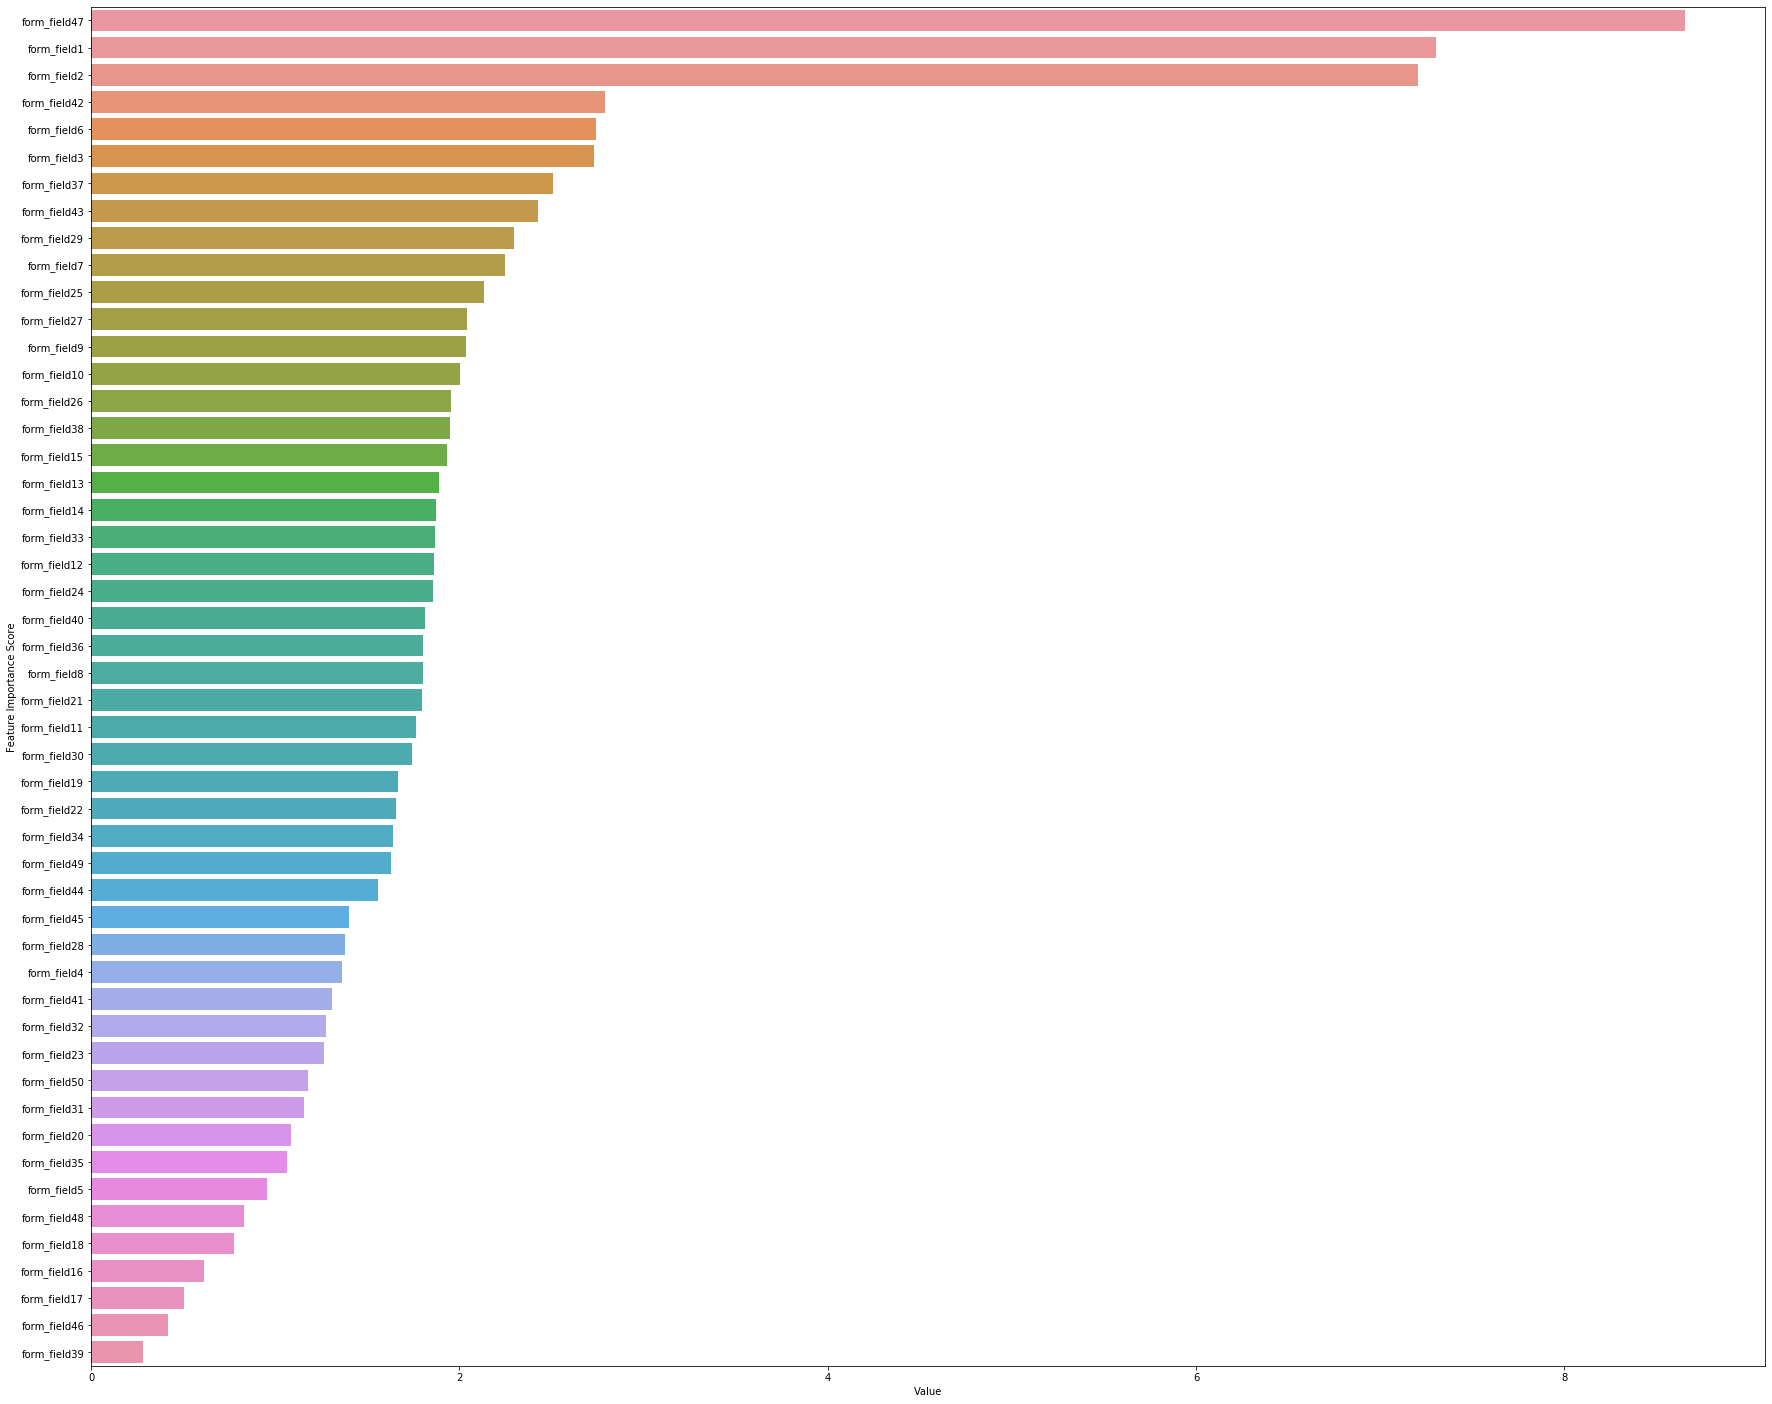

0.8412042259139193 0.8836301110945476 0.009099210217127717


In [25]:
catboost = cb.CatBoostClassifier(n_estimators=4000, 
                                   max_depth=7, eval_metric='AUC', random_seed = 10,
                                  subsample=0.9, learning_rate=0.045
                                  )

func_= func(train, target, test, catboost, 'catboost', 42)
val_p1, test_p1, model1 = func_()

### Random Forest

================================Fold1====================================

Validation scores 0.8238097233871435 0.42455009095262797
Training scores 0.8782873228248006 0.3782915627094531
================================Fold2====================================

Validation scores 0.8370226488321149 0.41240535790930927
Training scores 0.8772733908371346 0.37973495019639575
================================Fold3====================================

Validation scores 0.8301796373516956 0.419064789155345
Training scores 0.8779732465414749 0.3786924517826051
================================Fold4====================================

Validation scores 0.8265565520556458 0.4220184887181502
Training scores 0.8784989134441983 0.3781431165707343
================================Fold5====================================

Validation scores 0.834188030650096 0.4152103801386625
Training scores 0.877619369359627 0.3790907274893277
================================Fold6====================================



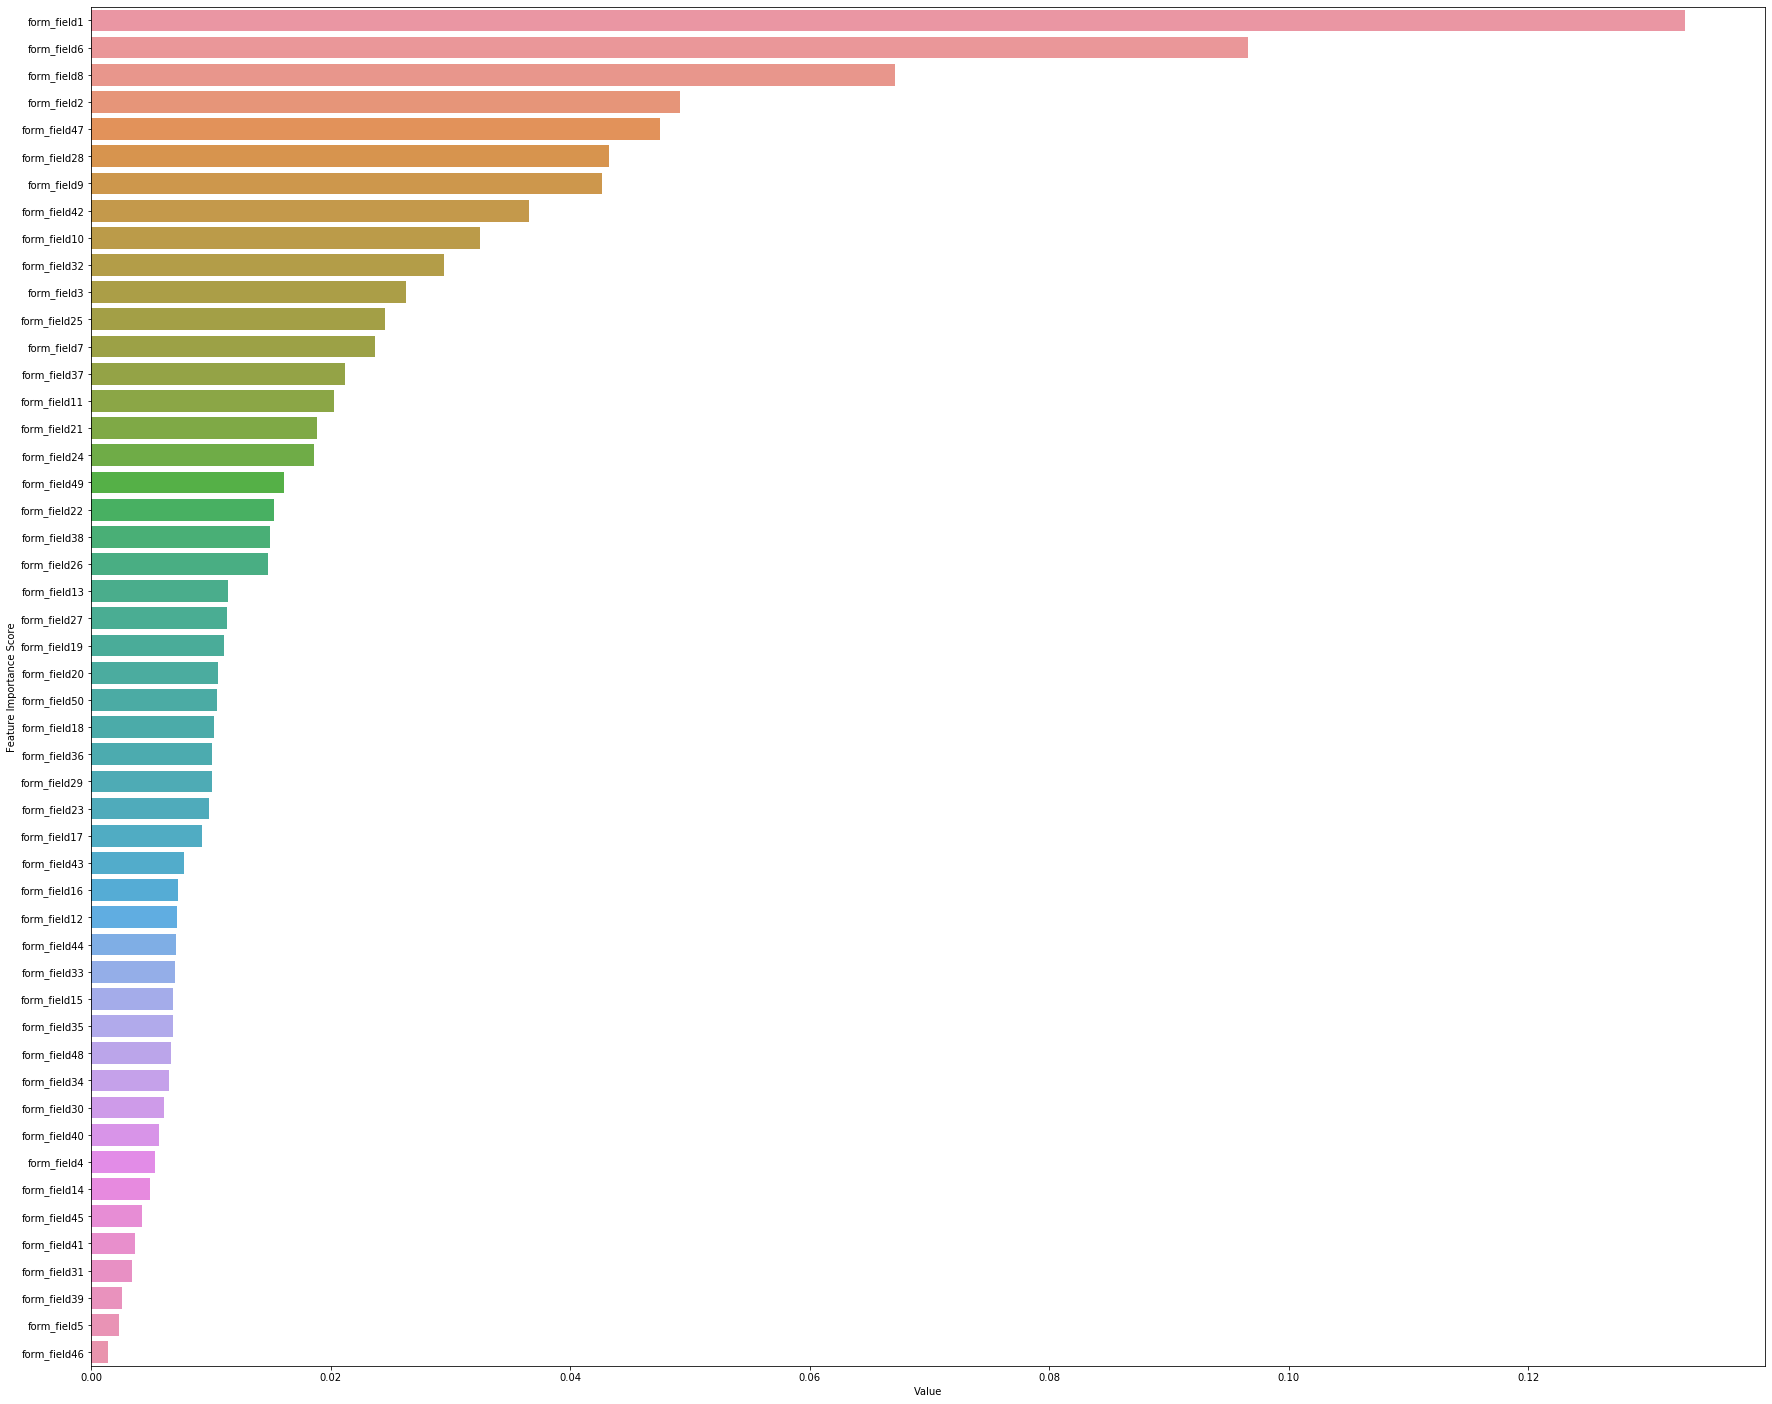

0.8315166878002014 0.8778884554988187 0.00903921406303118


In [26]:
rfc = RandomForestClassifier(criterion='entropy', max_depth=9, n_estimators=400)

func_ = func(train, target, test, rfc, 'rfc', random_state =42)

val_p2, test_p2, model2 = func_()

### XGBOOST

================================Fold1====================================
[19:11:01] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { sub_sample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-auc:0.76088
Will train until validation_0-auc hasn't improved in 150 rounds.
[1]	validation_0-auc:0.78771
[2]	validation_0-auc:0.80185
[3]	validation_0-auc:0.80940
[4]	validation_0-auc:0.81108
[5]	validation_0-auc:0.81380
[6]	validation_0-auc:0.81422
[7]	validation_0-auc:0.81528
[8]	validation_0-auc:0.81567
[9]	validation_0-auc:0.81639
[10]	validation_0-auc:0.81836
[11]	validation_0-auc:0.81895
[12]	validation_0-auc:0.81944
[13]	validation_0-auc:0.81978
[14]	validation_0-auc:0.81943
[15]	validation_0-auc:0.81954
[16

[53]	validation_0-auc:0.84012
[54]	validation_0-auc:0.83993
[55]	validation_0-auc:0.83939
[56]	validation_0-auc:0.83908
[57]	validation_0-auc:0.83889
[58]	validation_0-auc:0.83897
[59]	validation_0-auc:0.83916
[60]	validation_0-auc:0.83876
[61]	validation_0-auc:0.83844
[62]	validation_0-auc:0.83906
[63]	validation_0-auc:0.83864
[64]	validation_0-auc:0.83826
[65]	validation_0-auc:0.83812
[66]	validation_0-auc:0.83809
[67]	validation_0-auc:0.83761
[68]	validation_0-auc:0.83768
[69]	validation_0-auc:0.83713
[70]	validation_0-auc:0.83688
[71]	validation_0-auc:0.83690
[72]	validation_0-auc:0.83698
[73]	validation_0-auc:0.83693
[74]	validation_0-auc:0.83697
[75]	validation_0-auc:0.83633
[76]	validation_0-auc:0.83563
[77]	validation_0-auc:0.83537
[78]	validation_0-auc:0.83498
[79]	validation_0-auc:0.83483
[80]	validation_0-auc:0.83478
[81]	validation_0-auc:0.83469
[82]	validation_0-auc:0.83453
[83]	validation_0-auc:0.83477
[84]	validation_0-auc:0.83440
[85]	validation_0-auc:0.83415
[86]	valid

[112]	validation_0-auc:0.82510
[113]	validation_0-auc:0.82468
[114]	validation_0-auc:0.82458
[115]	validation_0-auc:0.82451
[116]	validation_0-auc:0.82424
[117]	validation_0-auc:0.82419
[118]	validation_0-auc:0.82464
[119]	validation_0-auc:0.82419
[120]	validation_0-auc:0.82417
[121]	validation_0-auc:0.82451
[122]	validation_0-auc:0.82459
[123]	validation_0-auc:0.82466
[124]	validation_0-auc:0.82483
[125]	validation_0-auc:0.82452
[126]	validation_0-auc:0.82445
[127]	validation_0-auc:0.82438
[128]	validation_0-auc:0.82426
[129]	validation_0-auc:0.82423
[130]	validation_0-auc:0.82383
[131]	validation_0-auc:0.82386
[132]	validation_0-auc:0.82345
[133]	validation_0-auc:0.82359
[134]	validation_0-auc:0.82331
[135]	validation_0-auc:0.82292
[136]	validation_0-auc:0.82280
[137]	validation_0-auc:0.82266
[138]	validation_0-auc:0.82264
[139]	validation_0-auc:0.82263
[140]	validation_0-auc:0.82221
[141]	validation_0-auc:0.82218
[142]	validation_0-auc:0.82193
[143]	validation_0-auc:0.82203
[144]	va

[176]	validation_0-auc:0.81056
Stopping. Best iteration:
[26]	validation_0-auc:0.82506


Validation scores 0.8250574038208963 0.4233909567054694
Training scores 0.8699002089273631 0.3729950877451911
================================Fold5====================================
[19:17:32] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { sub_sample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-auc:0.76351
Will train until validation_0-auc hasn't improved in 150 rounds.
[1]	validation_0-auc:0.80053
[2]	validation_0-auc:0.81506
[3]	validation_0-auc:0.82397
[4]	validation_0-auc:0.82719
[5]	validation_0-auc:0.82919
[6]	validation_0-auc:0.82932
[7]	validation_0-auc:0.83014
[8]	validation_0-auc:0.83078
[9]	validatio

[49]	validation_0-auc:0.83037
[50]	validation_0-auc:0.83054
[51]	validation_0-auc:0.83063
[52]	validation_0-auc:0.83054
[53]	validation_0-auc:0.83038
[54]	validation_0-auc:0.83036
[55]	validation_0-auc:0.83021
[56]	validation_0-auc:0.83047
[57]	validation_0-auc:0.83090
[58]	validation_0-auc:0.83053
[59]	validation_0-auc:0.83063
[60]	validation_0-auc:0.83007
[61]	validation_0-auc:0.83015
[62]	validation_0-auc:0.83017
[63]	validation_0-auc:0.83037
[64]	validation_0-auc:0.83048
[65]	validation_0-auc:0.83033
[66]	validation_0-auc:0.82974
[67]	validation_0-auc:0.83028
[68]	validation_0-auc:0.83032
[69]	validation_0-auc:0.82977
[70]	validation_0-auc:0.82991
[71]	validation_0-auc:0.82970
[72]	validation_0-auc:0.82913
[73]	validation_0-auc:0.82949
[74]	validation_0-auc:0.82933
[75]	validation_0-auc:0.82911
[76]	validation_0-auc:0.82901
[77]	validation_0-auc:0.82874
[78]	validation_0-auc:0.82800
[79]	validation_0-auc:0.82834
[80]	validation_0-auc:0.82808
[81]	validation_0-auc:0.82798
[82]	valid

[128]	validation_0-auc:0.80343
[129]	validation_0-auc:0.80379
[130]	validation_0-auc:0.80380
[131]	validation_0-auc:0.80378
[132]	validation_0-auc:0.80360
[133]	validation_0-auc:0.80365
[134]	validation_0-auc:0.80387
[135]	validation_0-auc:0.80372
[136]	validation_0-auc:0.80379
[137]	validation_0-auc:0.80329
[138]	validation_0-auc:0.80356
[139]	validation_0-auc:0.80363
[140]	validation_0-auc:0.80366
[141]	validation_0-auc:0.80367
[142]	validation_0-auc:0.80373
[143]	validation_0-auc:0.80358
[144]	validation_0-auc:0.80318
[145]	validation_0-auc:0.80332
[146]	validation_0-auc:0.80301
[147]	validation_0-auc:0.80293
[148]	validation_0-auc:0.80290
[149]	validation_0-auc:0.80254
[150]	validation_0-auc:0.80292
[151]	validation_0-auc:0.80241
[152]	validation_0-auc:0.80273
[153]	validation_0-auc:0.80209
[154]	validation_0-auc:0.80240
[155]	validation_0-auc:0.80234
[156]	validation_0-auc:0.80203
[157]	validation_0-auc:0.80199
[158]	validation_0-auc:0.80205
[159]	validation_0-auc:0.80181
[160]	va

[9]	validation_0-auc:0.84225
[10]	validation_0-auc:0.84289
[11]	validation_0-auc:0.84432
[12]	validation_0-auc:0.84437
[13]	validation_0-auc:0.84412
[14]	validation_0-auc:0.84445
[15]	validation_0-auc:0.84419
[16]	validation_0-auc:0.84384
[17]	validation_0-auc:0.84402
[18]	validation_0-auc:0.84500
[19]	validation_0-auc:0.84507
[20]	validation_0-auc:0.84424
[21]	validation_0-auc:0.84470
[22]	validation_0-auc:0.84503
[23]	validation_0-auc:0.84506
[24]	validation_0-auc:0.84522
[25]	validation_0-auc:0.84512
[26]	validation_0-auc:0.84421
[27]	validation_0-auc:0.84421
[28]	validation_0-auc:0.84404
[29]	validation_0-auc:0.84440
[30]	validation_0-auc:0.84426
[31]	validation_0-auc:0.84462
[32]	validation_0-auc:0.84448
[33]	validation_0-auc:0.84446
[34]	validation_0-auc:0.84470
[35]	validation_0-auc:0.84466
[36]	validation_0-auc:0.84426
[37]	validation_0-auc:0.84423
[38]	validation_0-auc:0.84387
[39]	validation_0-auc:0.84398
[40]	validation_0-auc:0.84359
[41]	validation_0-auc:0.84385
[42]	valida

[82]	validation_0-auc:0.83239
[83]	validation_0-auc:0.83220
[84]	validation_0-auc:0.83194
[85]	validation_0-auc:0.83194
[86]	validation_0-auc:0.83234
[87]	validation_0-auc:0.83209
[88]	validation_0-auc:0.83217
[89]	validation_0-auc:0.83178
[90]	validation_0-auc:0.83200
[91]	validation_0-auc:0.83168
[92]	validation_0-auc:0.83145
[93]	validation_0-auc:0.83125
[94]	validation_0-auc:0.83111
[95]	validation_0-auc:0.83097
[96]	validation_0-auc:0.83082
[97]	validation_0-auc:0.83060
[98]	validation_0-auc:0.83087
[99]	validation_0-auc:0.83064
[100]	validation_0-auc:0.83058
[101]	validation_0-auc:0.83056
[102]	validation_0-auc:0.83054
[103]	validation_0-auc:0.83052
[104]	validation_0-auc:0.83037
[105]	validation_0-auc:0.83034
[106]	validation_0-auc:0.83005
[107]	validation_0-auc:0.82973
[108]	validation_0-auc:0.82956
[109]	validation_0-auc:0.82946
[110]	validation_0-auc:0.82922
[111]	validation_0-auc:0.82883
[112]	validation_0-auc:0.82871
[113]	validation_0-auc:0.82882
[114]	validation_0-auc:0.8

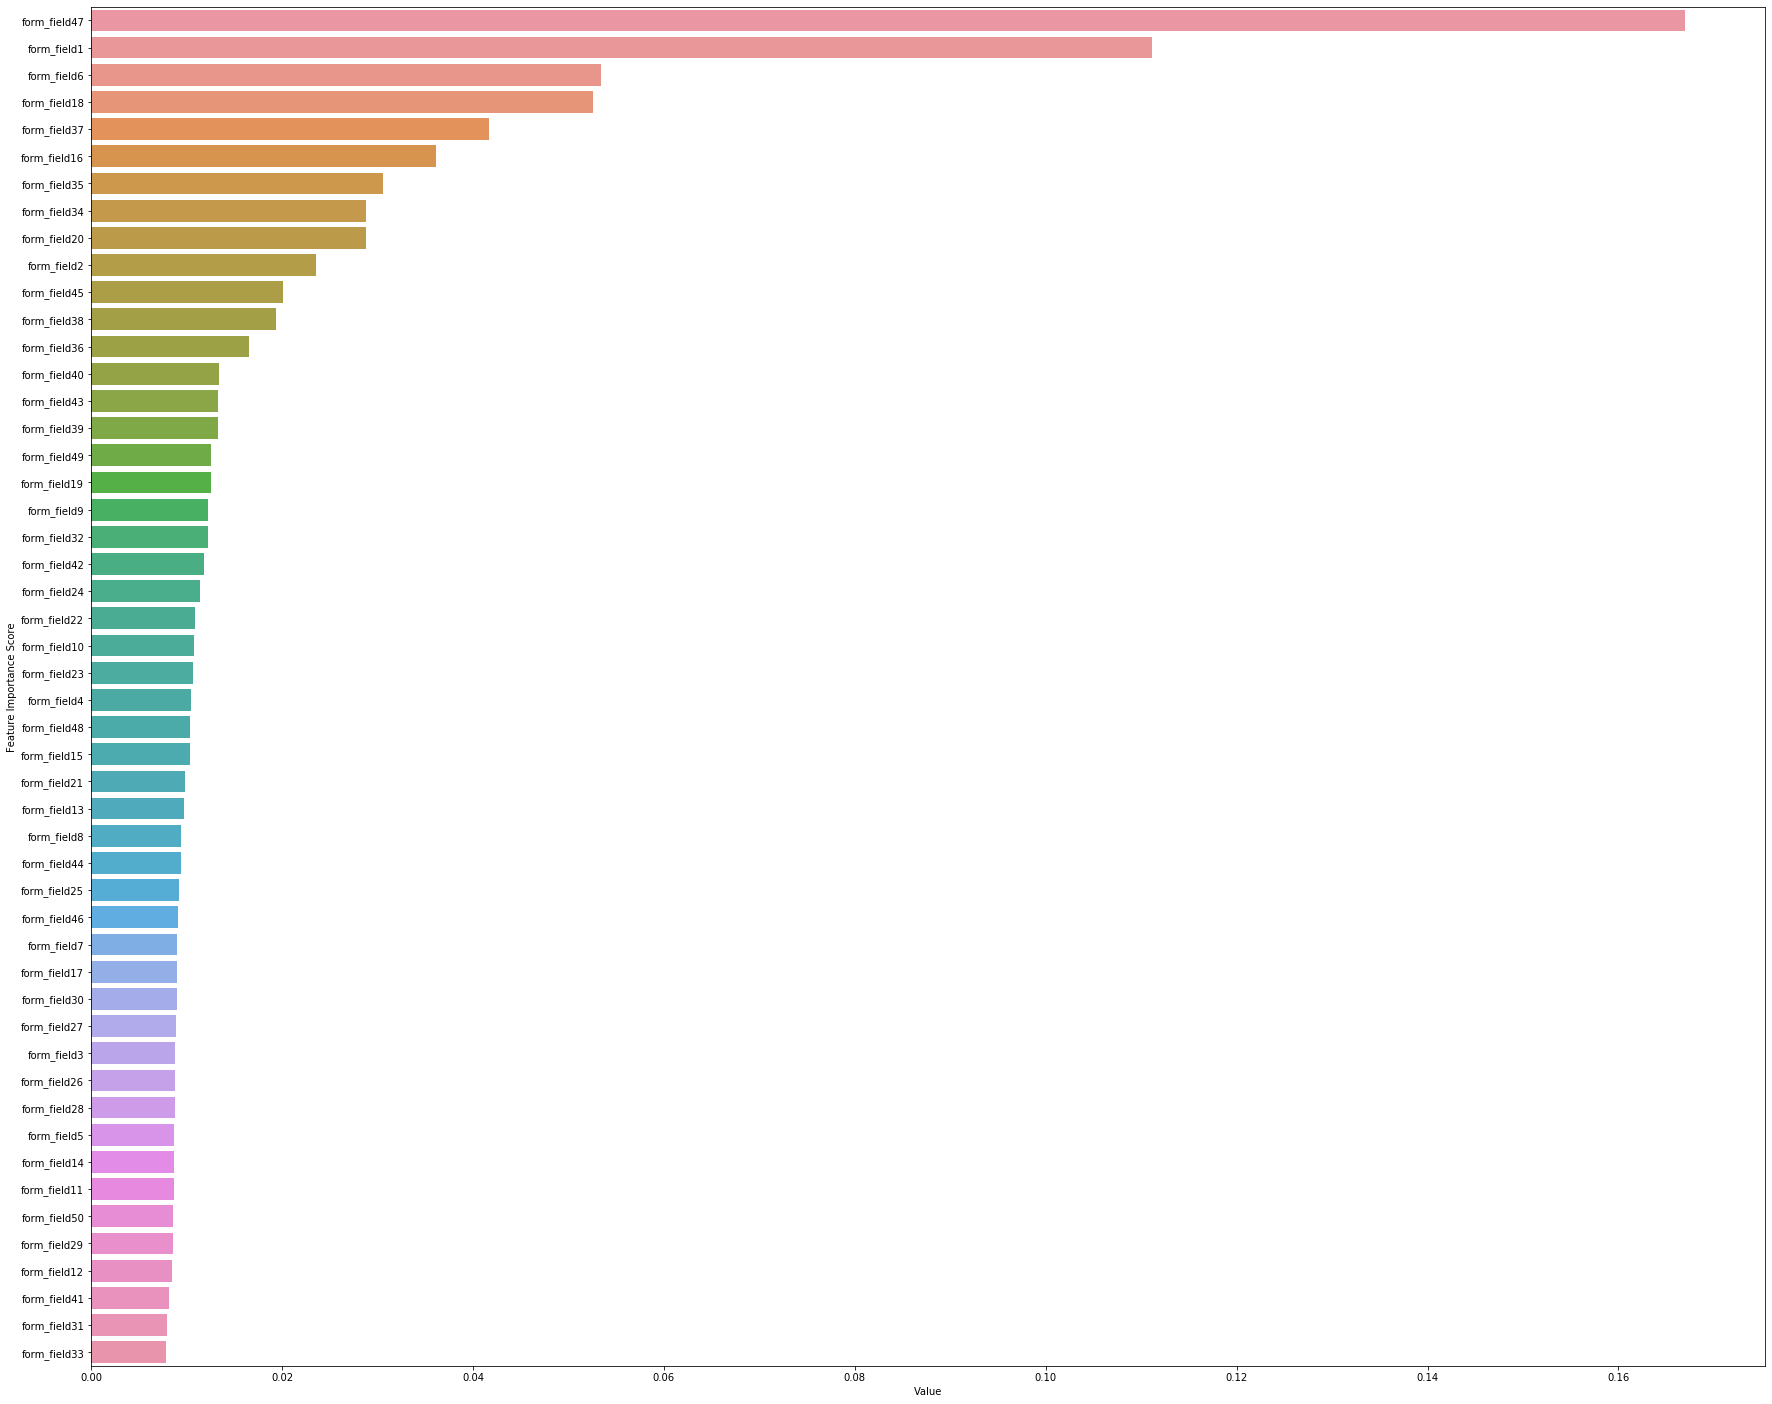

0.8322929590677164 0.8690798749987125 0.009421223538056122


In [27]:
xgboost = xgb.XGBClassifier(objective ='binary:logistic', 
                          eta = 0.98,
                          max_depth = 6, 
                          n_estimators = 5000,
                          reg_lambda = 500,
                          sub_sample = 0.8,
                          colsample_bytree = 0.8)

func_= func(train, target, test, xgboost, 'xgboost', 42)
val_p3, test_p3, model3 = func_()

### LGBM

================================Fold1====================================
[1]	valid_0's auc: 0.748901
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.760004
[3]	valid_0's auc: 0.767937
[4]	valid_0's auc: 0.781167
[5]	valid_0's auc: 0.785372
[6]	valid_0's auc: 0.78948
[7]	valid_0's auc: 0.792445
[8]	valid_0's auc: 0.794633
[9]	valid_0's auc: 0.796011
[10]	valid_0's auc: 0.79746
[11]	valid_0's auc: 0.799301
[12]	valid_0's auc: 0.799964
[13]	valid_0's auc: 0.801452
[14]	valid_0's auc: 0.803804
[15]	valid_0's auc: 0.805207
[16]	valid_0's auc: 0.806094
[17]	valid_0's auc: 0.807426
[18]	valid_0's auc: 0.808978
[19]	valid_0's auc: 0.809453
[20]	valid_0's auc: 0.810007
[21]	valid_0's auc: 0.81058
[22]	valid_0's auc: 0.811348
[23]	valid_0's auc: 0.812092
[24]	valid_0's auc: 0.812672
[25]	valid_0's auc: 0.813393
[26]	valid_0's auc: 0.813876
[27]	valid_0's auc: 0.814051
[28]	valid_0's auc: 0.814858
[29]	valid_0's auc: 0.815442
[30]	valid_0's auc: 0.815705
[31]	va

[62]	valid_0's auc: 0.830476
[63]	valid_0's auc: 0.830598
[64]	valid_0's auc: 0.830608
[65]	valid_0's auc: 0.830672
[66]	valid_0's auc: 0.83083
[67]	valid_0's auc: 0.831059
[68]	valid_0's auc: 0.831311
[69]	valid_0's auc: 0.83141
[70]	valid_0's auc: 0.831432
[71]	valid_0's auc: 0.831635
[72]	valid_0's auc: 0.831788
[73]	valid_0's auc: 0.831941
[74]	valid_0's auc: 0.832082
[75]	valid_0's auc: 0.832184
[76]	valid_0's auc: 0.832244
[77]	valid_0's auc: 0.83236
[78]	valid_0's auc: 0.832405
[79]	valid_0's auc: 0.832542
[80]	valid_0's auc: 0.832685
[81]	valid_0's auc: 0.832855
[82]	valid_0's auc: 0.833057
[83]	valid_0's auc: 0.833032
[84]	valid_0's auc: 0.833119
[85]	valid_0's auc: 0.833333
[86]	valid_0's auc: 0.833445
[87]	valid_0's auc: 0.833524
[88]	valid_0's auc: 0.833578
[89]	valid_0's auc: 0.833486
[90]	valid_0's auc: 0.833618
[91]	valid_0's auc: 0.833701
[92]	valid_0's auc: 0.833724
[93]	valid_0's auc: 0.8337
[94]	valid_0's auc: 0.83382
[95]	valid_0's auc: 0.833906
[96]	valid_0's auc: 

[16]	valid_0's auc: 0.816695
[17]	valid_0's auc: 0.817641
[18]	valid_0's auc: 0.817854
[19]	valid_0's auc: 0.818518
[20]	valid_0's auc: 0.819457
[21]	valid_0's auc: 0.820228
[22]	valid_0's auc: 0.820393
[23]	valid_0's auc: 0.821013
[24]	valid_0's auc: 0.821658
[25]	valid_0's auc: 0.822612
[26]	valid_0's auc: 0.823106
[27]	valid_0's auc: 0.823655
[28]	valid_0's auc: 0.824054
[29]	valid_0's auc: 0.824443
[30]	valid_0's auc: 0.825009
[31]	valid_0's auc: 0.825238
[32]	valid_0's auc: 0.825383
[33]	valid_0's auc: 0.825948
[34]	valid_0's auc: 0.826272
[35]	valid_0's auc: 0.826514
[36]	valid_0's auc: 0.826595
[37]	valid_0's auc: 0.827153
[38]	valid_0's auc: 0.827384
[39]	valid_0's auc: 0.827578
[40]	valid_0's auc: 0.827906
[41]	valid_0's auc: 0.828195
[42]	valid_0's auc: 0.828397
[43]	valid_0's auc: 0.828738
[44]	valid_0's auc: 0.828945
[45]	valid_0's auc: 0.829327
[46]	valid_0's auc: 0.829393
[47]	valid_0's auc: 0.829516
[48]	valid_0's auc: 0.829846
[49]	valid_0's auc: 0.82999
[50]	valid_0's 

[82]	valid_0's auc: 0.834286
[83]	valid_0's auc: 0.834385
[84]	valid_0's auc: 0.834603
[85]	valid_0's auc: 0.834677
[86]	valid_0's auc: 0.834683
[87]	valid_0's auc: 0.834903
[88]	valid_0's auc: 0.835042
[89]	valid_0's auc: 0.83507
[90]	valid_0's auc: 0.835201
[91]	valid_0's auc: 0.835254
[92]	valid_0's auc: 0.835164
[93]	valid_0's auc: 0.835253
[94]	valid_0's auc: 0.835302
[95]	valid_0's auc: 0.835358
[96]	valid_0's auc: 0.83534
[97]	valid_0's auc: 0.835386
[98]	valid_0's auc: 0.83549
[99]	valid_0's auc: 0.835646
[100]	valid_0's auc: 0.835676
Did not meet early stopping. Best iteration is:
[100]	valid_0's auc: 0.835676

Validation scores 0.8356763944934644 0.4108597996526089
Training scores 0.8401012217564868 0.40654472569323247
================================Fold9====================================
[1]	valid_0's auc: 0.777571
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.786156
[3]	valid_0's auc: 0.802462
[4]	valid_0's auc: 0.815496
[5]	valid_0's 

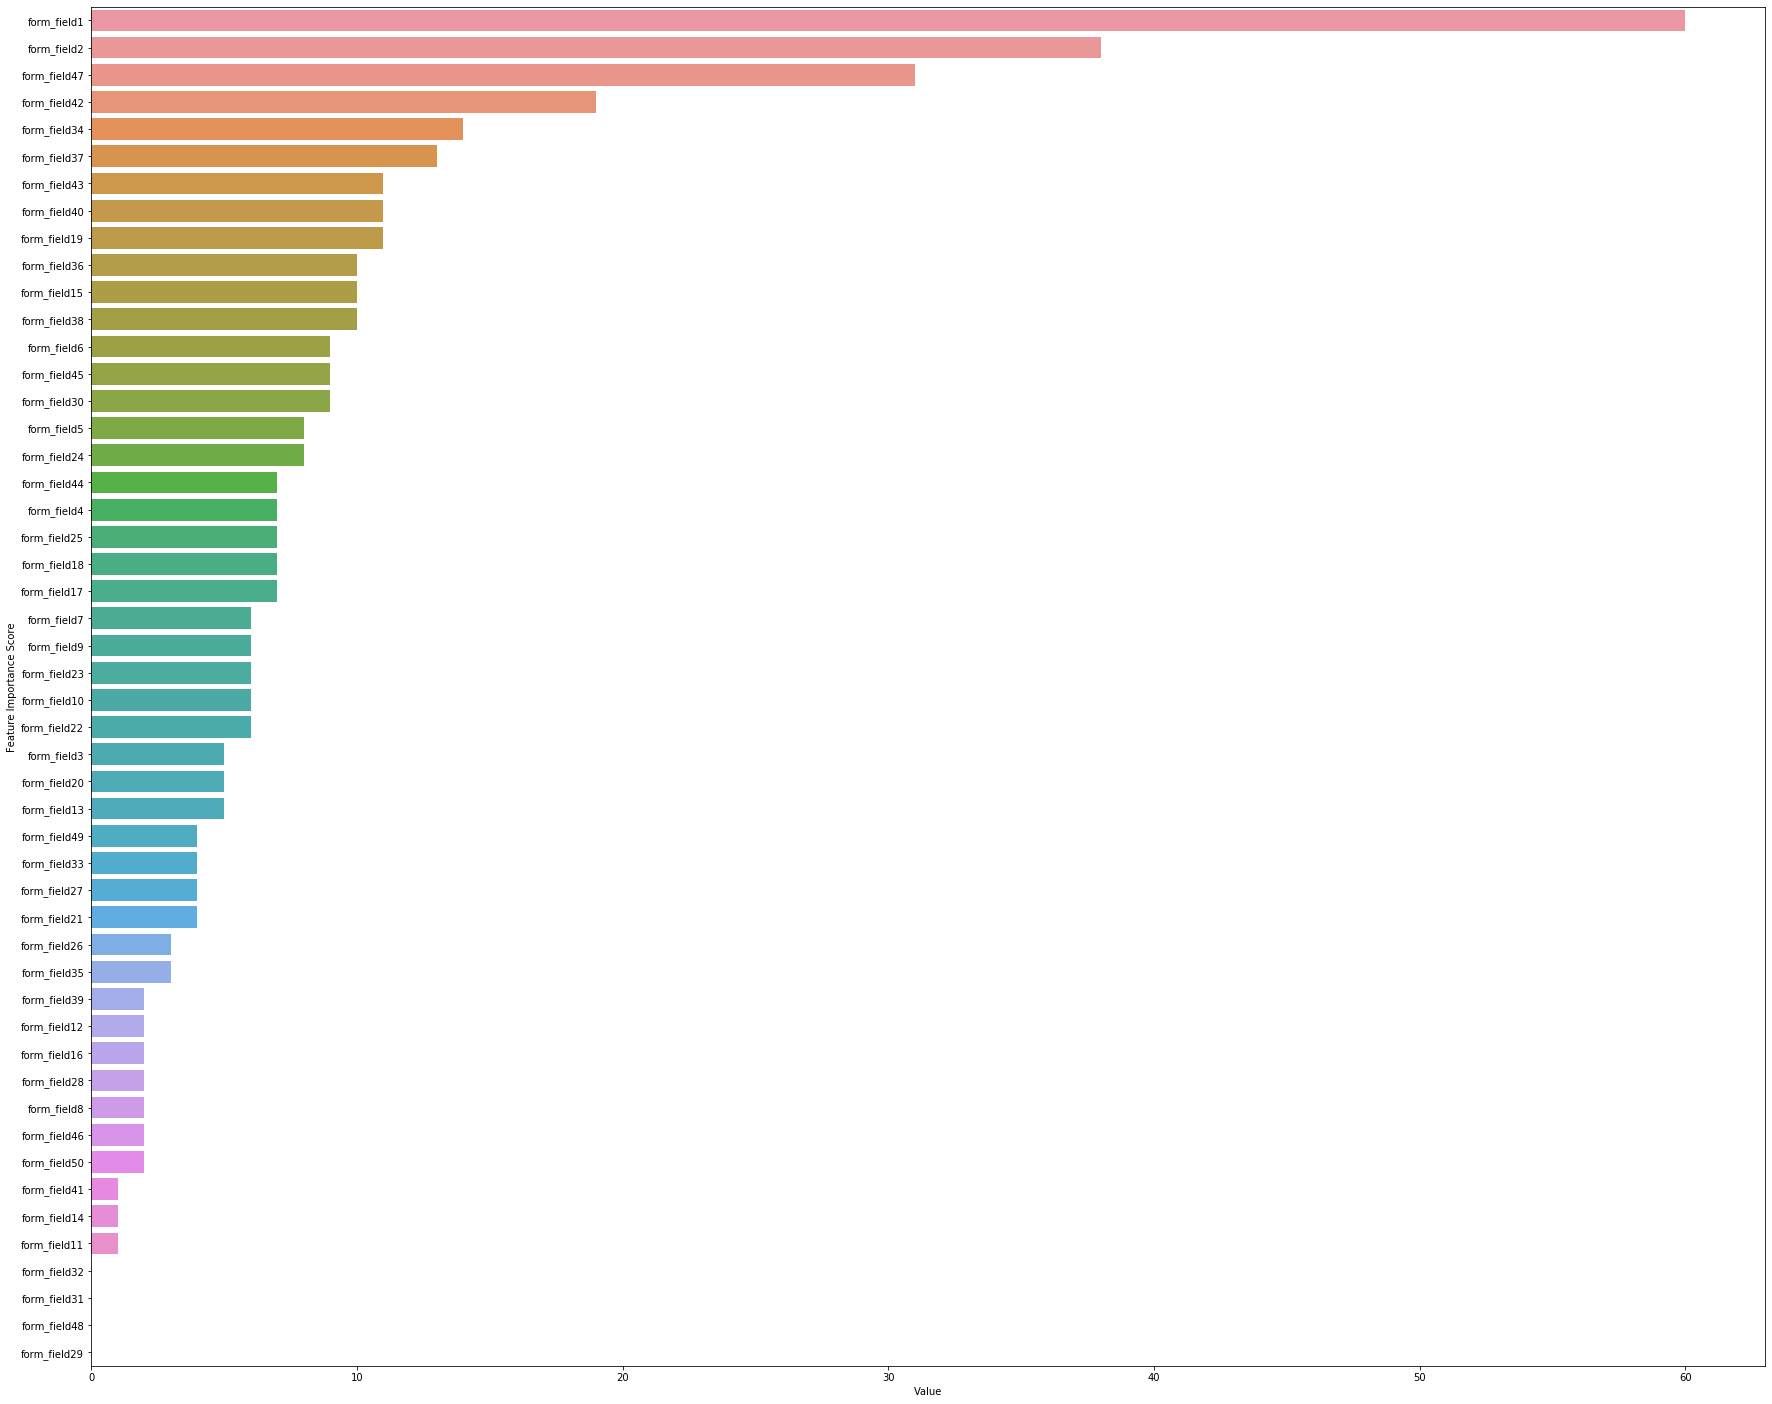

0.834756818713682 0.8404547979217016 0.009427659700597009


In [28]:
import lightgbm as lgb
lgb_model = lgb.LGBMClassifier(objective = 'binary',
                       metric = 'auc',
                       boosting_type = 'gbdt',
                       feature_pre_filter = False,
                       lambda_l1 = 0.0,
                       lambda_l2 = 0.0,
                       num_leaves = 5,
                       feature_fraction = 0.6799999999999999,
                       bagging_fraction = 0.9650890426025689,
                       bagging_freq = 1,
                       min_chIld_samples = 20)

func_= func(train, target, test, lgb_model, 'lgbm', 42)
val_p4, test_p4, model4 = func_()

In [31]:
from sklearn.linear_model import  LinearRegression, Ridge, Lasso
stack = np.column_stack((val_p1, val_p2, val_p3, val_p4))
stack_p = np.column_stack((test_p1,test_p2, test_p3, test_p4))
predict = LinearRegression().fit(stack, target).predict(stack_p)

In [32]:
final_sub = pd.DataFrame(predict)

final_sub.to_csv('Final_submission.csv',index=False)